In [1]:
pip install Pillow

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.offsetbox import AnnotationBbox, TextArea, HPacker, VPacker
from PIL import Image
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LECTURA FICHERO Y MODIFICACIÓN DEL DATA SET

In [4]:
df= pd.read_csv("/content/drive/MyDrive/CURSO PYTHON/PFM/PRUEBAS.csv",encoding= "UTF-8" , sep=";")

In [5]:
df

,ENTRENADOR,CLIENTE,TIPO_CLIENTE,CP CLUB,CLUB,SEXO,FECHA_NACIM,CP,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL,MEDIO_PAGO
0,Camilo Restrepo,Alexandra Cruz,Entrenado,46120.0,BF Alboraya,F,04/04/1999,46131,"24,95",8.0,45.0,199.600,Domicialización
1,Camilo Restrepo,Ana Beatriz Saud,Potencial,46120.0,BF Alboraya,F,19/12/1966,46011,25,8.0,45.0,199.000,TPV Virtual
2,Camilo Restrepo,Antonio Plaza,Entrenado,46120.0,BF Alboraya,M,16/03/1994,46011,36,5.0,45.0,180.000,Domicialización
3,Camilo Restrepo,Enrrique Pavón Marti,Potencial,46120.0,BF Alboraya,M,15/04/1964,46011,35,4.0,45.0,140.000,Domicialización
4,Camilo Restrepo,Giosevid Acosta,Potencial,46120.0,BF Alboraya,M,24/08/1986,NaN,NaN,0.0,NaN,NaN,Efectivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,Pablo Veldhuizen,Rodolfo Rodríguez Jiménez,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Tarjeta
5981,Pablo Veldhuizen,Sergio Marrupe,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,NaN,0.0,NaN,NaN,TPV Virtual
5982,Pablo Veldhuizen,Test - Agustin Fila,Entrenado,28033.0,BF Virgen del Carmen,M,NaN,NaN,NaN,NaN,NaN,NaN,Domicialización
5983,Pablo Veldhuizen,Test - Sebas GymGy,Entrenado,28033.0,BF Virgen del Carmen,F,NaN,NaN,NaN,NaN,NaN,NaN,Domicialización


In [6]:
df.columns

Index(['ENTRENADOR', 'CLIENTE', 'TIPO_CLIENTE', 'CP CLUB', 'CLUB', 'SEXO',
       'FECHA_NACIM', 'CP', 'COSTE_SESION', 'CANTIDAD_SESIONES_MES',
       'DURACION_SESIONES', 'COSTE_MENSUAL', 'MEDIO_PAGO'],
      dtype='object')

In [7]:
df.head()

,ENTRENADOR,CLIENTE,TIPO_CLIENTE,CP CLUB,CLUB,SEXO,FECHA_NACIM,CP,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL,MEDIO_PAGO
0,Camilo Restrepo,Alexandra Cruz,Entrenado,46120.0,BF Alboraya,F,04/04/1999,46131,"24,95",8.0,45.0,199.600,Domicialización
1,Camilo Restrepo,Ana Beatriz Saud,Potencial,46120.0,BF Alboraya,F,19/12/1966,46011,25,8.0,45.0,199.000,TPV Virtual
2,Camilo Restrepo,Antonio Plaza,Entrenado,46120.0,BF Alboraya,M,16/03/1994,46011,36,5.0,45.0,180.000,Domicialización
3,Camilo Restrepo,Enrrique Pavón Marti,Potencial,46120.0,BF Alboraya,M,15/04/1964,46011,35,4.0,45.0,140.000,Domicialización
4,Camilo Restrepo,Giosevid Acosta,Potencial,46120.0,BF Alboraya,M,24/08/1986,NaN,NaN,0.0,NaN,NaN,Efectivo


In [8]:
df.tail()

,ENTRENADOR,CLIENTE,TIPO_CLIENTE,CP CLUB,CLUB,SEXO,FECHA_NACIM,CP,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL,MEDIO_PAGO
5980,Pablo Veldhuizen,Rodolfo Rodríguez Jiménez,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Tarjeta
5981,Pablo Veldhuizen,Sergio Marrupe,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,NaN,0.0,NaN,NaN,TPV Virtual
5982,Pablo Veldhuizen,Test - Agustin Fila,Entrenado,28033.0,BF Virgen del Carmen,M,NaN,NaN,NaN,NaN,NaN,NaN,Domicialización
5983,Pablo Veldhuizen,Test - Sebas GymGy,Entrenado,28033.0,BF Virgen del Carmen,F,NaN,NaN,NaN,NaN,NaN,NaN,Domicialización
5984,Pablo Veldhuizen,WeeLoon Tee,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,NaN,0.0,NaN,NaN,TPV Virtual


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5985 entries, 0 to 5984
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ENTRENADOR             5985 non-null   object 
 1   CLIENTE                5985 non-null   object 
 2   TIPO_CLIENTE           5984 non-null   object 
 3   CP CLUB                5903 non-null   float64
 4   CLUB                   5985 non-null   object 
 5   SEXO                   5397 non-null   object 
 6   FECHA_NACIM            3797 non-null   object 
 7   CP                     4136 non-null   object 
 8   COSTE_SESION           5822 non-null   object 
 9   CANTIDAD_SESIONES_MES  5981 non-null   float64
 10  DURACION_SESIONES      5223 non-null   float64
 11  COSTE_MENSUAL          5830 non-null   object 
 12  MEDIO_PAGO             5985 non-null   object 
dtypes: float64(3), object(10)
memory usage: 608.0+ KB


In [10]:
df.shape

(5985, 13)

In [11]:
df['CLUB'].value_counts()

CLUB
BF Goya                         1040
BF P,Florida                     691
BF P,Vallecas                    477
BF S,Romualdo                    426
BF Coslada                       264
BF Virgen del Carmen             246
BF Padre Xifre                   246
BF Sor Angela                    241
BF Joaquín Costa                 224
BF G,Manzana                     192
BF Pintor Maella                 176
BF Mestre Rodrigo                115
BF Burjassot                     113
BF Sagunto                       109
BF Fuencarral                    109
BF Alboraya                      104
BF Alcalali                       89
BF Paseo de la Petxina            89
BF Elche Avinguda de Alacant      84
BF Valcarlos                      82
BF Cartagena Colon                78
BF Costa Rica                     76
BF Montera                        76
BF Padre Recadero                 76
BF Jose Ferrandez                 72
BF Primer de Maig                 69
BF Murcia                        

In [12]:
df.columns

Index(['ENTRENADOR', 'CLIENTE', 'TIPO_CLIENTE', 'CP CLUB', 'CLUB', 'SEXO',
       'FECHA_NACIM', 'CP', 'COSTE_SESION', 'CANTIDAD_SESIONES_MES',
       'DURACION_SESIONES', 'COSTE_MENSUAL', 'MEDIO_PAGO'],
      dtype='object')

In [13]:
df['COSTE_SESION'].value_counts()

COSTE_SESION
28.450    646
35.000    376
27.200    349
0         308
23.750    275
         ... 
27.783      1
22.490      1
89.950      1
16.725      1
60.350      1
Name: count, Length: 621, dtype: int64

In [14]:
valor_a_eliminar = 'Alexandra Cruz'

In [15]:
df = df.loc[df['CLIENTE'] != valor_a_eliminar ]
print(df)

            ENTRENADOR                    CLIENTE TIPO_CLIENTE  CP CLUB  \
1      Camilo Restrepo           Ana Beatriz Saud    Potencial  46120.0   
2      Camilo Restrepo              Antonio Plaza    Entrenado  46120.0   
3      Camilo Restrepo       Enrrique Pavón Marti    Potencial  46120.0   
4      Camilo Restrepo            Giosevid Acosta    Potencial  46120.0   
5      Camilo Restrepo                Sandra Soto    Potencial  46120.0   
...                ...                        ...          ...      ...   
5980  Pablo Veldhuizen  Rodolfo Rodríguez Jiménez    Entrenado  28033.0   
5981  Pablo Veldhuizen             Sergio Marrupe    Entrenado  28033.0   
5982  Pablo Veldhuizen        Test - Agustin Fila    Entrenado  28033.0   
5983  Pablo Veldhuizen         Test - Sebas GymGy    Entrenado  28033.0   
5984  Pablo Veldhuizen                WeeLoon Tee    Entrenado  28033.0   

                      CLUB SEXO FECHA_NACIM     CP COSTE_SESION  \
1              BF Alboraya    F 

In [16]:
df = df[df['COSTE_MENSUAL'] != '2.317.100']


In [17]:
df = df[df['COSTE_MENSUAL'] != '1.170.000']

In [18]:
df = df[df['COSTE_MENSUAL'] != '1.138.000']

In [19]:
df['COSTE_SESION'] = df['COSTE_SESION'].astype(float)
df['COSTE_MENSUAL'] = df['COSTE_MENSUAL'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5981 entries, 1 to 5984
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ENTRENADOR             5981 non-null   object 
 1   CLIENTE                5981 non-null   object 
 2   TIPO_CLIENTE           5980 non-null   object 
 3   CP CLUB                5899 non-null   float64
 4   CLUB                   5981 non-null   object 
 5   SEXO                   5393 non-null   object 
 6   FECHA_NACIM            3796 non-null   object 
 7   CP                     4134 non-null   object 
 8   COSTE_SESION           5818 non-null   float64
 9   CANTIDAD_SESIONES_MES  5977 non-null   float64
 10  DURACION_SESIONES      5219 non-null   float64
 11  COSTE_MENSUAL          5826 non-null   float64
 12  MEDIO_PAGO             5981 non-null   object 
dtypes: float64(5), object(8)
memory usage: 654.2+ KB


In [21]:
df.head()

,ENTRENADOR,CLIENTE,TIPO_CLIENTE,CP CLUB,CLUB,SEXO,FECHA_NACIM,CP,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL,MEDIO_PAGO
1,Camilo Restrepo,Ana Beatriz Saud,Potencial,46120.0,BF Alboraya,F,19/12/1966,46011,25.0,8.0,45.0,199.0,TPV Virtual
2,Camilo Restrepo,Antonio Plaza,Entrenado,46120.0,BF Alboraya,M,16/03/1994,46011,36.0,5.0,45.0,180.0,Domicialización
3,Camilo Restrepo,Enrrique Pavón Marti,Potencial,46120.0,BF Alboraya,M,15/04/1964,46011,35.0,4.0,45.0,140.0,Domicialización
4,Camilo Restrepo,Giosevid Acosta,Potencial,46120.0,BF Alboraya,M,24/08/1986,NaN,NaN,0.0,NaN,NaN,Efectivo
5,Camilo Restrepo,Sandra Soto,Potencial,46120.0,BF Alboraya,F,08/11/1979,46011,25.0,8.0,45.0,199.0,Domicialización


In [45]:
df2=df[df['TIPO_CLIENTE']=='Potencial']

In [46]:
df2.head()

,ENTRENADOR,TIPO_CLIENTE,CP CLUB,CLUB,SEXO,FECHA_NACIM,CP,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL,MEDIO_PAGO,REGIONAL
1,Camilo Restrepo,Potencial,46120.0,BF Alboraya,F,19/12/1966,46011,25.0,8.0,45.0,199.0,TPV Virtual,PEDRO
3,Camilo Restrepo,Potencial,46120.0,BF Alboraya,M,15/04/1964,46011,35.0,4.0,45.0,140.0,Domicialización,PEDRO
4,Camilo Restrepo,Potencial,46120.0,BF Alboraya,M,24/08/1986,NaN,0.0,0.0,0.0,0.0,Efectivo,PEDRO
5,Camilo Restrepo,Potencial,46120.0,BF Alboraya,F,08/11/1979,46011,25.0,8.0,45.0,199.0,Domicialización,PEDRO
7,Emi Rossi,Potencial,46120.0,BF Alboraya,F,07/12/1995,46133,18.0,4.0,45.0,70.0,TPV Virtual,PEDRO


In [48]:
df3=df[df['TIPO_CLIENTE']=='Entrenado']
df3.head()

,ENTRENADOR,TIPO_CLIENTE,CP CLUB,CLUB,SEXO,FECHA_NACIM,CP,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL,MEDIO_PAGO,REGIONAL
2,Camilo Restrepo,Entrenado,46120.0,BF Alboraya,M,16/03/1994,46011,36.0,5.0,45.0,180.0,Domicialización,PEDRO
6,Camilo Restrepo,Entrenado,46120.0,BF Alboraya,F,30/05/1976,46011,35.0,2.0,45.0,70.0,TPV Virtual,PEDRO
14,Entrenador Bajas Entrenadores,Entrenado,46120.0,BF Alboraya,F,04/06/1999,46020,35.0,2.0,45.0,70.0,TPV Virtual,PEDRO
32,Victoria Abbondanza,Entrenado,46120.0,BF Alboraya,NaN,23/01/1977,46011,35.0,4.0,0.0,140.0,Domicialización,PEDRO
36,Victoria Abbondanza,Entrenado,46120.0,BF Alboraya,NaN,25/02/1979,NaN,40.0,5.0,0.0,200.0,Domicialización,PEDRO


In [22]:
cols= ['COSTE_SESION','DURACION_SESIONES', 'COSTE_MENSUAL','CANTIDAD_SESIONES_MES' ]

In [23]:
#CORRELACION DE DATOS
#ELIJO LAS COLUMNAS
df1=df[['COSTE_SESION','DURACION_SESIONES', 'COSTE_MENSUAL','CANTIDAD_SESIONES_MES']]
df1.corr()

,COSTE_SESION,DURACION_SESIONES,COSTE_MENSUAL,CANTIDAD_SESIONES_MES
COSTE_SESION,1.000000,0.262387,0.191959,-0.187910
DURACION_SESIONES,0.262387,1.000000,0.221956,-0.038670
COSTE_MENSUAL,0.191959,0.221956,1.000000,0.485246
CANTIDAD_SESIONES_MES,-0.187910,-0.038670,0.485246,1.000000


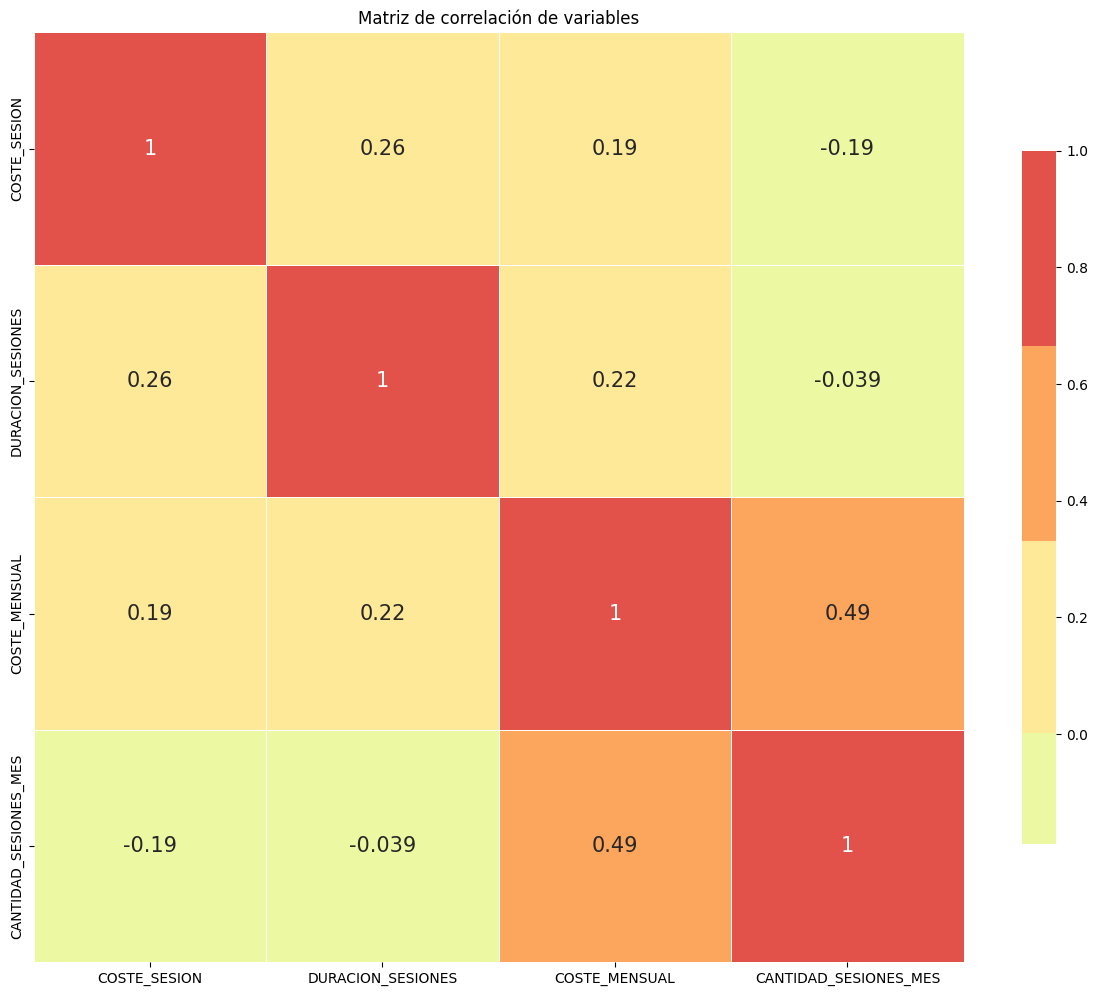

In [24]:
df_corr = df1.corr()

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.color_palette("Spectral_r")
sns.heatmap(
    df_corr, cmap=cmap, center=0, annot=True, annot_kws={'size':15},
    square=True, linewidths=.5, cbar_kws={"shrink": .6})
ax.set_title('Matriz de correlación de variables')
plt.show()

In [25]:
# Sustituir . por ,
def replace_dot_with_comma(value):
    try:
        # Reemplazar puntos por comas
        return value.replace('.', ',')
    except AttributeError:
        return value  # Manejar casos donde el valor ya es de tipo float o NaN

In [26]:
for col in cols:
    df[col] = df[col].apply(replace_dot_with_comma)

In [27]:
df.head()

,ENTRENADOR,CLIENTE,TIPO_CLIENTE,CP CLUB,CLUB,SEXO,FECHA_NACIM,CP,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL,MEDIO_PAGO
1,Camilo Restrepo,Ana Beatriz Saud,Potencial,46120.0,BF Alboraya,F,19/12/1966,46011,25.0,8.0,45.0,199.0,TPV Virtual
2,Camilo Restrepo,Antonio Plaza,Entrenado,46120.0,BF Alboraya,M,16/03/1994,46011,36.0,5.0,45.0,180.0,Domicialización
3,Camilo Restrepo,Enrrique Pavón Marti,Potencial,46120.0,BF Alboraya,M,15/04/1964,46011,35.0,4.0,45.0,140.0,Domicialización
4,Camilo Restrepo,Giosevid Acosta,Potencial,46120.0,BF Alboraya,M,24/08/1986,NaN,NaN,0.0,NaN,NaN,Efectivo
5,Camilo Restrepo,Sandra Soto,Potencial,46120.0,BF Alboraya,F,08/11/1979,46011,25.0,8.0,45.0,199.0,Domicialización


In [28]:
df.tail()

,ENTRENADOR,CLIENTE,TIPO_CLIENTE,CP CLUB,CLUB,SEXO,FECHA_NACIM,CP,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL,MEDIO_PAGO
5980,Pablo Veldhuizen,Rodolfo Rodríguez Jiménez,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Tarjeta
5981,Pablo Veldhuizen,Sergio Marrupe,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,NaN,0.0,NaN,NaN,TPV Virtual
5982,Pablo Veldhuizen,Test - Agustin Fila,Entrenado,28033.0,BF Virgen del Carmen,M,NaN,NaN,NaN,NaN,NaN,NaN,Domicialización
5983,Pablo Veldhuizen,Test - Sebas GymGy,Entrenado,28033.0,BF Virgen del Carmen,F,NaN,NaN,NaN,NaN,NaN,NaN,Domicialización
5984,Pablo Veldhuizen,WeeLoon Tee,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,NaN,0.0,NaN,NaN,TPV Virtual


In [29]:
# ESTABLECER PARA LOS VALORES NAN DE LAS COLUMNAS DURACION SESIONES LA MEDIA DEL RESTO DE LA COLUMNAS.
df[cols] = df[cols].fillna(0)

In [30]:
df.tail()

,ENTRENADOR,CLIENTE,TIPO_CLIENTE,CP CLUB,CLUB,SEXO,FECHA_NACIM,CP,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL,MEDIO_PAGO
5980,Pablo Veldhuizen,Rodolfo Rodríguez Jiménez,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Tarjeta
5981,Pablo Veldhuizen,Sergio Marrupe,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,0.0,0.0,0.0,0.0,TPV Virtual
5982,Pablo Veldhuizen,Test - Agustin Fila,Entrenado,28033.0,BF Virgen del Carmen,M,NaN,NaN,0.0,0.0,0.0,0.0,Domicialización
5983,Pablo Veldhuizen,Test - Sebas GymGy,Entrenado,28033.0,BF Virgen del Carmen,F,NaN,NaN,0.0,0.0,0.0,0.0,Domicialización
5984,Pablo Veldhuizen,WeeLoon Tee,Entrenado,28033.0,BF Virgen del Carmen,NaN,NaN,NaN,0.0,0.0,0.0,0.0,TPV Virtual


In [31]:
df=df.drop(columns=['CLIENTE'])

In [43]:
df.describe()

,CP CLUB,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL
count,5899.000000,5981.000000,5981.000000,5981.000000,5981.000000
mean,30093.747076,30.558786,4.888146,33.626484,144.360491
std,10172.524789,20.410265,3.964689,16.537135,85.611141
min,3005.000000,0.000000,0.000000,0.000000,0.000000
25%,28002.000000,23.750000,4.000000,30.000000,91.950000
50%,28033.000000,28.450000,4.000000,30.000000,135.000000
75%,28823.000000,35.000000,8.000000,45.000000,190.000000
max,46920.000000,369.800000,140.000000,60.000000,994.000000


In [32]:
df.head()

,ENTRENADOR,TIPO_CLIENTE,CP CLUB,CLUB,SEXO,FECHA_NACIM,CP,COSTE_SESION,CANTIDAD_SESIONES_MES,DURACION_SESIONES,COSTE_MENSUAL,MEDIO_PAGO
1,Camilo Restrepo,Potencial,46120.0,BF Alboraya,F,19/12/1966,46011,25.0,8.0,45.0,199.0,TPV Virtual
2,Camilo Restrepo,Entrenado,46120.0,BF Alboraya,M,16/03/1994,46011,36.0,5.0,45.0,180.0,Domicialización
3,Camilo Restrepo,Potencial,46120.0,BF Alboraya,M,15/04/1964,46011,35.0,4.0,45.0,140.0,Domicialización
4,Camilo Restrepo,Potencial,46120.0,BF Alboraya,M,24/08/1986,NaN,0.0,0.0,0.0,0.0,Efectivo
5,Camilo Restrepo,Potencial,46120.0,BF Alboraya,F,08/11/1979,46011,25.0,8.0,45.0,199.0,Domicialización


In [33]:
df['CANTIDAD_SESIONES_MES'].value_counts()

CANTIDAD_SESIONES_MES
4.0      2413
8.0      1585
1.0       459
0.0       454
2.0       419
12.0      195
6.0       119
5.0       113
3.0       106
10.0       60
9.0        14
16.0       14
7.0        11
20.0        3
11.0        2
13.0        2
15.0        2
60.0        1
130.0       1
30.0        1
14.0        1
21.0        1
22.0        1
45.0        1
25.0        1
140.0       1
18.0        1
Name: count, dtype: int64

In [34]:
df['COSTE_MENSUAL'].value_counts()

COSTE_MENSUAL
113.80    654
217.60    345
140.00    321
190.00    286
0.00      250
         ... 
57.90       1
399.50      1
75.85       1
202.00      1
80.80       1
Name: count, Length: 656, dtype: int64

In [35]:
df['CLUB'].value_counts()

CLUB
BF Goya                         1038
BF P,Florida                     691
BF P,Vallecas                    477
BF S,Romualdo                    426
BF Coslada                       264
BF Virgen del Carmen             246
BF Padre Xifre                   245
BF Sor Angela                    241
BF Joaquín Costa                 224
BF G,Manzana                     192
BF Pintor Maella                 176
BF Mestre Rodrigo                115
BF Burjassot                     113
BF Sagunto                       109
BF Fuencarral                    109
BF Alboraya                      103
BF Alcalali                       89
BF Paseo de la Petxina            89
BF Elche Avinguda de Alacant      84
BF Valcarlos                      82
BF Cartagena Colon                78
BF Costa Rica                     76
BF Montera                        76
BF Padre Recadero                 76
BF Jose Ferrandez                 72
BF Primer de Maig                 69
BF Murcia                        

In [36]:
df_alejandro=['BF S,Romualdo','BF P,Vallecas','BF Coslada','BF Virgen del Carmen']
df_Carlos=['BF Salvador Allende','BF Maria Tubau','BF Heroes de Sastoa','BF G,Manzana','BF Sor Angela','BF Valcarlos','BF Armengual de la mota','BF Isaac Peral','BF Rincón de la Victoria']
df_Nerea=['BF Goya','BF Padre Xifre','BF Fuencarral','BF P,Florida']
df_Pedro=['BF Fray Luis de Colomer','BF Isaac Peral','BF Guillem de Castro','BF Cartagena Alfonso XII','BF Felix Garcia Palacios','BF Sant Antoni','BF Moncada','BF Eduard Bosca','BF Doctor Peset','BF Murcia','BF Primer de Maig','BF Jose Ferrandez','BF Padre Recadero','BF Costa Rica','BF Cartagena Colon','BF Elche Avinguda de Alacant','BF Paseo de la Petxina','BF Alcalali','BF Alboraya','BF Sagunto','BF Burjassot','BF Mestre Rodrigo','BF Pintor Maella','BF Joaquín Costa']


In [37]:
df['REGIONAL'] =''

In [38]:
for index, club in enumerate(df['CLUB']):
    if club in df_alejandro:
        df.at[index, 'REGIONAL'] = 'ALEJANDRO'
    if club in df_Nerea:
        df.at[index, 'REGIONAL'] = 'NEREA'
    if club in df_Pedro:
        df.at[index, 'REGIONAL'] = 'PEDRO'
    elif club in df_Carlos:
        df.at[index, 'REGIONAL'] = 'CARLOS'

print(df)

            ENTRENADOR TIPO_CLIENTE  CP CLUB                  CLUB SEXO  \
1      Camilo Restrepo    Potencial  46120.0           BF Alboraya    F   
2      Camilo Restrepo    Entrenado  46120.0           BF Alboraya    M   
3      Camilo Restrepo    Potencial  46120.0           BF Alboraya    M   
4      Camilo Restrepo    Potencial  46120.0           BF Alboraya    M   
5      Camilo Restrepo    Potencial  46120.0           BF Alboraya    F   
...                ...          ...      ...                   ...  ...   
5984  Pablo Veldhuizen    Entrenado  28033.0  BF Virgen del Carmen  NaN   
0                  NaN          NaN      NaN                   NaN  NaN   
1688               NaN          NaN      NaN                   NaN  NaN   
2050               NaN          NaN      NaN                   NaN  NaN   
4379               NaN          NaN      NaN                   NaN  NaN   

     FECHA_NACIM     CP  COSTE_SESION  CANTIDAD_SESIONES_MES  \
1     19/12/1966  46011          25

In [39]:
df.to_excel('archivo_con_edad.xlsx', index=False)

In [40]:
from google.colab import files
files.download('archivo_con_edad.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2. ANÁLISIS ESTADÍSTICO / DESCRIPTIVO DE LOS DATOS

In [41]:
#APLICAR DESCRIBE A LAS COLUMNAS. MODULO 6 PARA CREAR UN TOP DE CLIENTES.

In [42]:
#GRAFICAR

3. MACHU